## Trading Strategies

## Simple Moving Average

In [28]:
import numpy as np
import pandas as pd
import datetime as dt
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [29]:
import pandas_datareader.data as web
data = web.DataReader('WIPRO.NS', 'yahoo', '2016-01-01','2022-09-30')

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1668 entries, 2016-01-01 to 2022-09-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1668 non-null   float64
 1   Low        1668 non-null   float64
 2   Open       1668 non-null   float64
 3   Close      1668 non-null   float64
 4   Volume     1668 non-null   float64
 5   Adj Close  1668 non-null   float64
dtypes: float64(6)
memory usage: 91.2 KB


SMA1 = 42
SMA2 = 252

data['SMA1'] = data['Close'].rolling(SAM1).mean()
data['SMA2'] = data['Close'].rolling(SAM2).mean()

data.plot(figsize(10,6))




<AxesSubplot:xlabel='Date'>

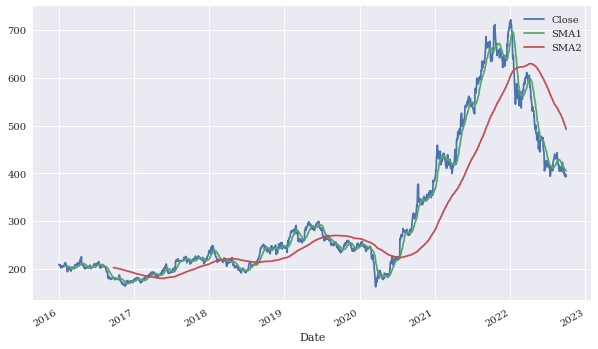

In [31]:
SMA1 = 20
SMA2 = 180

data['SMA1'] = data['Close'].rolling(SMA1).mean()
data['SMA2'] = data['Close'].rolling(SMA2).mean()

data[['Close','SMA1','SMA2']].plot(figsize=(10,6))

In [32]:
data['Position'] = np.where(data['SMA1']> data['SMA2'], 1, -1)
data

,High,Low,Open,Close,Volume,Adj Close,SMA1,SMA2,Position
Date,,,,,,,,,
2016-01-01,209.925049,207.787552,209.925049,208.668808,1582762.0,200.972595,NaN,NaN,-1
2016-01-04,210.000046,208.500046,208.875046,209.137558,1715818.0,201.424103,NaN,NaN,-1
2016-01-05,211.875046,207.843796,210.750046,208.837555,2343764.0,201.135147,NaN,NaN,-1
2016-01-06,209.925049,207.375046,208.875046,208.162552,3061769.0,200.485046,NaN,NaN,-1
2016-01-07,209.043808,205.162552,207.375046,206.193802,5584145.0,198.588898,NaN,NaN,-1
...,...,...,...,...,...,...,...,...,...
2022-09-26,399.200012,384.600006,392.000000,394.799988,9497072.0,394.799988,407.787500,499.316667,-1
2022-09-27,401.399994,392.000000,396.799988,398.399994,6227347.0,398.399994,407.489999,497.566112,-1
2022-09-28,400.500000,395.350006,396.000000,398.049988,4460795.0,398.049988,406.714999,495.856667,-1


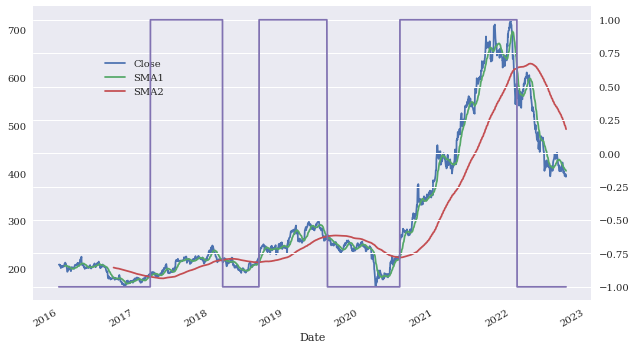

In [33]:
ax = data[['Close','SMA1','SMA2', 'Position']].plot(secondary_y = 'Position', figsize=(10,6))
ax.legend().set_bbox_to_anchor((0.25,0.85))

In [34]:
data['Returns'] = np.log(data['Close']/data['Close'].shift(1))
data['Strategy']  = data['Position'].shift(1)*data['Returns']

In [35]:
data.tail()

,High,Low,Open,Close,Volume,Adj Close,SMA1,SMA2,Position,Returns,Strategy
Date,,,,,,,,,,,
2022-09-26,399.200012,384.600006,392.000000,394.799988,9497072.0,394.799988,407.787500,499.316667,-1,0.001140,-0.001140
2022-09-27,401.399994,392.000000,396.799988,398.399994,6227347.0,398.399994,407.489999,497.566112,-1,0.009077,-0.009077
2022-09-28,400.500000,395.350006,396.000000,398.049988,4460795.0,398.049988,406.714999,495.856667,-1,-0.000879,0.000879
2022-09-29,401.899994,391.549988,401.000000,392.799988,5941534.0,392.799988,405.832498,494.086112,-1,-0.013277,0.013277
2022-09-30,396.700012,387.500000,392.450012,394.250000,6783729.0,394.250000,405.159998,492.423612,-1,0.003685,-0.003685


In [36]:
np.exp(data[['Returns','Strategy']].sum())

Returns     1.889358
Strategy    4.427796
dtype: float64

In [37]:
data[['Returns', 'Strategy']].std()*252**0.5

Returns     0.263268
Strategy    0.262956
dtype: float64

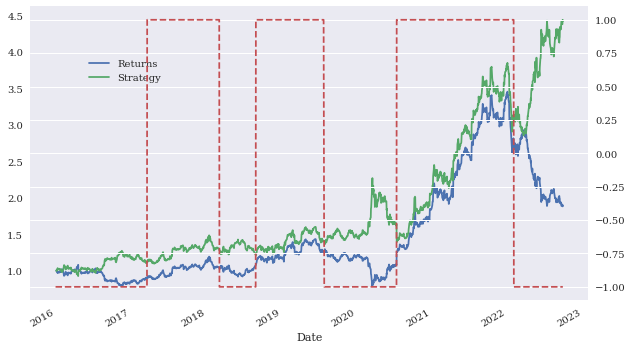

In [38]:
ax = data[['Returns', 'Strategy']].cumsum(
 ).apply(np.exp).plot(figsize=(10, 6))
data['Position'].plot(ax=ax, secondary_y='Position', style='--')
ax.get_legend().set_bbox_to_anchor((0.25, 0.85));

In [39]:
from itertools import product
sma1 = range(20, 61, 4) 
sma2 = range(180, 281, 10) 

results = pd.DataFrame()
for SMA1, SMA2 in product(sma1, sma2): 
    data = pd.DataFrame(data)
    data.dropna(inplace=True)
    data['Returns'] = np.log(data['Close'] / data['Close'].shift(1))
    data['SMA1'] = data['Close'].rolling(SMA1).mean()
    data['SMA2'] = data['Close'].rolling(SMA2).mean()
    data.dropna(inplace=True)
    data['Position'] = np.where(data['SMA1'] > data['SMA2'], 1, -1)
    data['Strategy'] = data['Position'].shift(1) * data['Returns']
    data.dropna(inplace=True)
    perf = np.exp(data[['Returns', 'Strategy']].sum())
    results = results.append(pd.DataFrame(
    {'SMA1': SMA1, 'SMA2': SMA2,
   'MARKET': perf['Returns'],
 'STRATEGY': perf['Strategy'],
 'OUT': perf['Strategy'] - perf['Returns']},
 index=[0]), ignore_index=True)

C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykern

C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykern

C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykernel_2976\3955186038.py:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append(pd.DataFrame(
C:\Users\NEXT\AppData\Local\Temp\ipykern

In [40]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SMA1      121 non-null    int64  
 1   SMA2      121 non-null    int64  
 2   MARKET    121 non-null    float64
 3   STRATEGY  121 non-null    float64
 4   OUT       121 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 4.9 KB


In [41]:
results.sort_values('OUT', ascending=False).head(7)

,SMA1,SMA2,MARKET,STRATEGY,OUT
0,20,180,2.015206,3.792558,1.777352
2,20,200,1.599229,3.275526,1.676297
1,20,190,1.780412,3.268135,1.487723
3,20,210,1.659651,2.855529,1.195878
4,20,220,1.048677,2.220201,1.171524
5,20,230,0.590327,1.197213,0.606886
6,20,240,0.972256,1.028535,0.056279
